# JR東海「そうだ 京都、行こう。」風ポスター風画像を作る('24.06.03)

## 1993年に始まったJR東海CM「そうだ 京都、行こう。」

一昨日、JRが1990年から展開していた「青春18切符のポスター」風画像を作った。
今日は、1993年の秋、平安遷都1200年に合わせてJR東海がが始めたキャンペーン、[そうだ 京都、行こう。](https://souda-kyoto.jp/campaign/index.html)風のポスター画像を作ってみようと思う。

作成手順は、

- コピー文と解説文はChatGPTに生成させる
- コピー文と写真画像を合成する

という手順で、基本的に[一昨日](https://hirax.github.io/wow/html/day_240601_seisyun18.html)と同じだ。
下記例は、伏見稲荷大社を題材にChatGPTに作成してもらった文面を使い、伏見稲荷大社の山頂で撮影した写真を使って「ポスター画像」を作成してみた。

In [1]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt

def put_text(img, text, anchor, direction,anc_pos, size, color):
    font = ImageFont.truetype(
        "data/day_240601_ipamp.ttf", size)
    img = Image.fromarray(img)
    draw = ImageDraw.Draw(img)
    draw.text(anchor,
              text,
              fill=color,
              font=font,
              direction=direction,
              anchor=anc_pos
             )
    return np.array(img)

def put_multilinetext(img, text, anchor, direction, size, color):
    font = ImageFont.truetype(
        "data/day_240601_ipamp.ttf", size)
    img = Image.fromarray(img)
    draw = ImageDraw.Draw(img)
    draw.multiline_text(anchor, text,
            fill=color,
            font=font,
            direction=direction)
    return np.array(img)

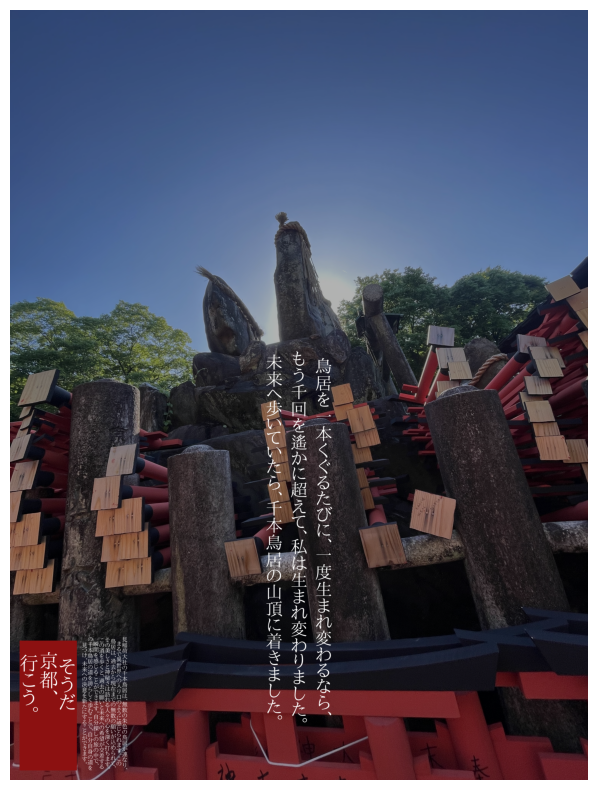

In [2]:
# 画像を読み込む
img= cv2.cvtColor(cv2.imread("images/day_240602_kyoto.png")
                  ,cv2.COLOR_BGR2RGB)
# 赤枠内の文字を描く
img[img.shape[0]-730:img.shape[0]-50,50:350,0]=200
img[img.shape[0]-730:img.shape[0]-50,50:350,1]=25
img[img.shape[0]-730:img.shape[0]-50,50:350,2]=25

img[:,:,:] = img[:,:,:]*0.7

# コピー文を描画
img = put_text(img, 'そうだ' , 
    (300, img.shape[0]-500), 'ttb','mm', # 'rtl' 'mm' lt'
    100,        # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色   フォントサイズ
img = put_text(img, '京都、　', 
    (200, img.shape[0]-500), 'ttb','mm', # 'rtl' 'mm' lt'
    100,        # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色   フォントサイズ
img = put_text(img, '行こう。', 
    (100, img.shape[0]-500), 'ttb','mm', # 'rtl' 'mm' lt'
    100,        # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色   フォントサイズ

mesages=[
'見稲荷大社の千本鳥居は、無数の朱色の鳥居が連なり、',
'まるで異世界への入り口のように感じられます。この',
'鳥居は、過去から現在までの無数の願いが込められて、',
'その美しさと神秘さは訪れる人々の心を深く打ちます。',
'この道を歩くと、過去の願いと未来への希望が交差する',
'瞬間を感じることができます。自分探しの旅の中で、',
'の千本鳥居の道を誇らしく歩むことで、自分自身の道を',
'見つけ、未来への決意を新たにすることができます。'
]
x=600
for mes in mesages:
    img = put_text(img, mes, 
        (x, img.shape[0]-400), 'ttb','mm', # 'rtl' 'mm' lt'
        30,        # ttfから読み出すフォントサイズ
        (255, 255, 255))  # 文字色   フォントサイズ
    x=x-30

hon_mesage='鳥居を一本くぐるたびに、一度生まれ変わるなら、'
# コピー文を描画
img = put_text(img, hon_mesage, 
    (img.shape[1]/2+130, img.shape[0]/2+750), 'ttb','mm', # 'rtl' 'mm' lt'
    90,        # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色   フォントサイズ
hon_mesage='もう千回を遙かに超えて、私は生まれ変わりました。'
# コピー文を描画
img = put_text(img, hon_mesage, 
    (img.shape[1]/2, img.shape[0]/2+750), 'ttb','mm', # 'rtl' 'mm' lt'
    90,        # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色   フォントサイズ
hon_mesage='未来へ歩いていたら、千本鳥居の山頂に着きました。'
# コピー文を描画
img = put_text(img, hon_mesage, 
    (img.shape[1]/2-130, img.shape[0]/2+750), 'ttb','mm', # 'rtl' 'mm' lt'
    90,        # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色   フォントサイズ

fig=plt.figure(figsize=[10,10])
plt.imshow(img)
plt.axis('off')
plt.show()

## 未来へ歩いていたら、千本鳥居の山頂に着きました。

1993年秋に始まった「そうだ 京都、行こう。」キャンペーン、その冬に流れたのが「伏見稲荷大社編」](https://www.youtube.com/watch?app=desktop&v=QYaUQy4XXXU)で、オリジナルTV CMのナレータ文は「私は、今、昔々に向かって歩いています。 あれ、どこまで来たのかな？  1200年を行ったり来たり出来る京都です。」だった。

過去に向かって歩いていた1993年の秋を踏まえると、ChatGPTが生成した、未来に向かって歩くコピー文「鳥居を一本くぐるたびに、一度生まれ変わるなら、もう千回を遙かに超えて、私は生まれ変わりました。未来へ歩いていたら、千本鳥居の山頂に着きました。」も意外に悪くない。
毎日寝て起きるたびに私たちは生まれ変わっているようなものだから、あるいは一瞬ごとに何かが入れ替わっているようなものだから、未来に向かい変身するコピー文も、悪くない気がする。

## 千本鳥居の山頂までは「数十分」の道のりがあるけれど…

1993年の秋といえば、幻想的なゲームMYSTとか一人称視点ゲームのDOOMが発売された頃だ。
もう30以上前だから、その頃を思い出そうとしても、霧の向こうにある景色のような気もする。
けれど、それと同時に、30年なんてあっという間だったように思う。

伏見稲荷大社の千本鳥居は、実際には千本どころではなくて、山頂までは数十分は歩いたはずだ。
そして、山頂に登るまでは時間が掛かるように思えたけれど、山頂に辿り着いたときには過去の時間は一瞬に感じたような気がする。
だから、人生の最終地点は、きっとあっという間に訪れるのだろうと思う。